# Purpose: Fit the integral of land use change plus industrial CO2 emissions times a constant to <CO2> estimates from 1750-2017

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf
from scipy.optimize import curve_fit
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17CO2')

Read two input files separately and assign the year values and methane concentration data

In [2]:
df1 = pd.read_excel('heat18parameters04jan.xlsx')
df1.to_csv('heat18parameters04jan.csv',header=False,index=False)
df1 = pd.read_csv('heat18parameters04jan.csv')
# df1.drop(df1.index[[-1]],inplace=True)
# df1.drop(df1.columns[5], axis=1,inplace=True)
# print (df1)

df2 = pd.read_csv('heat18co2-1-2017jun241.csv') # results of excel sheet from code of radiative forcing
df2.to_csv('heat18co2-1-2017jun242.csv',header=False,index=False)
df3 = pd.read_csv('heat18co2-1-2017jun242.csv')
df3.drop(df3.index[[-1]],inplace=True)
# print (df3)


Prepare for the nomenclature for the output excel sheet

In [3]:
out1 = 'historical';
out2 = 'co2';
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] # abbreviations for months to insert in output file name
date = datetime.date.today().strftime("%Y-%m-%d")
date_split = date.split('-') # split the date string we create by symbol "-"
yrs = str(int(date_split[0])-2000) # real years minus 2000 
seq = [out1, yrs, out2,months[int(date_split[1])-1],date_split[2]]
seperator = ','
filename = seperator.join(seq).replace(',', '')
print (filename)

historical18co2jun25


Integrate CO2  Industrial  Plus Land Use Emissions Fits

In [4]:
gtonnecperppm = df1.iloc[2, 3]
print (gtonnecperppm)
t0 = df1.iloc[11, 3]
# tmax = df1.iloc[12, 3]
b1 = df1.iloc[2,0]
b2 = df1.iloc[2,1]
b3 = df1.iloc[2,2]
co20 = df1.iloc[17, 2] # (* from heat17<co2>prefit16dec.nb *)

b28 = 212.309 # (* ppm/GHa multiplies deforestation rate to get ppm/yr CO2 emissions if all were retained in the atmosphere *)
print (b3)
# def logint(t):
#      y1 = b1*b3*(math.log(1+np.exp((t-b2)/b3))-math.log(1+np.exp((t0-b2)/b3)))
#      return y1
def logint(t):
     y1 = b1*b3*(np.log(1+np.exp((t-b2)/b3))-np.log(1+np.exp((t0-b2)/b3)))
     return y1

# def logint(t):
#      y = b1*b3*(math.log(1+np.exp(t-b2)/b3)-math.log(1+np.exp(t0-b2)/b3)
#      return y
b11 = df1.iloc[1,0] # (* deforestation rate *)
b21 = df1.iloc[1,1] # (* deforestation rate *)
b31 = df1.iloc[1,2] # (* deforestation rate *)

def logisticind(t):
    y2 = (1/gtonnecperppm)*logint(t)
    return y2

# cumulative global deforestation estimates  
def dlogintdt(t):
    y3 = b11/(1+np.exp(-(t-b21)/b31))
    return y3

dlogintdt0 = dlogintdt(t0)
print (dlogintdt0)

2.13
29.3045
0.6037829333505659


Industrial

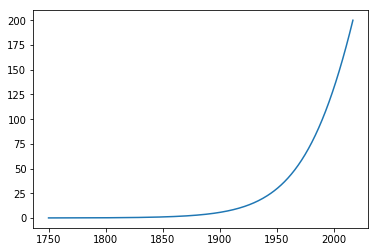

In [5]:
t0 = df1.iloc[11, 3].tolist()
t0 = int(t0)
# t0 = t0.astype(int)
tmax = df1.iloc[12, 3].tolist()
tmax = int(tmax)
# tmax = tmax.astype(int)
# print (t0)
# print (tmax)
t = range(t0,tmax+1)
# t = t.astype(int)
# f2 = np.vectorize(logisticind)
# logisticind = np.vectorize(logisticind)
t = np.array(t)
# y = logisticind(x)
# print (df1.iloc[2,:])
plt.plot(t,logisticind(t), label="data")
# plt.plot(t,logisticind(t), label="data")

Land Use

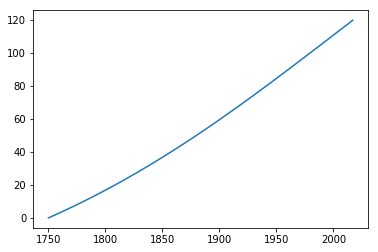

In [6]:
def co2logintland(t):
    y4 = b28*(dlogintdt(t)-dlogintdt0)/gtonnecperppm # (* part of cumulative <CO2> increase proportional to deforestation rate, if all were retained in the atmosphee *) 
    # b28 times (deforestation area at time equals t minus initial deforestation area) divided by conversion prefactor
    return y4
# tmax = df1.iloc[12, 3]
# t0 = df1.iloc[11, 3].tolist()
# t0 = int(t0)
# tmax = df1.iloc[12, 3].tolist()
# tmax = int(tmax)
# print (t0)
# print (tmax)
t = range(t0,tmax+1)
plt.plot(t,co2logintland(t))

integrate guass function

In [7]:
def gaussint(t,b1,b2,b3):
#     y = b1*b3*np.sqrt(math.pi/2)*(math.erf((b2-t0)/(math.sqrt(2)*b3))-math.erf((b2-t)/(math.sqrt(2)*b3)))
    y = b1*b3*np.sqrt(np.pi/2)*(erf((b2-t0)/(np.sqrt(2)*b3))-erf((b2-t)/(np.sqrt(2)*b3)))
    return y
print (gaussint(1950,0.242542, 1910.93, 19.6327))

11.65792557160685


In [8]:
bg = [] # results from co2 landuse fit from (g1 b1 d1) to (g4 b4 d4).
for i in range(3,7):
    sub_list=[]
    for m in range(0,3):
        x = df1.iloc[i,m].tolist()
        sub_list.append(float(x))
    bg.append(sub_list)
#     new_list.append(sub_list)
print (bg)
print (bg[0][0])

[[0.242542, 1910.93, 19.6327], [0.199856, 1932.79, 5.56251], [0.770546, 1959.73, 9.13007], [0.964413, 1993.14, 15.2089]]
0.242542


In [9]:
def gaussland(t):
    y = gaussint(t,bg[0][0],bg[0][1],bg[0][2])+gaussint(t,bg[1][0],bg[1][1],bg[1][2])+gaussint(t,bg[2][0],bg[2][1],bg[2][2])+gaussint(t,bg[3][0],bg[3][1],bg[3][2]) 
    return y
# def gaussland(t):
#     y = f3(t,bg[0][0],bg[0][1],bg[0][2])+f3(t,bg[1][0],bg[1][1],bg[1][2])+f3(t,bg[2][0],bg[2][1],bg[2][2])+f3(t,bg[3][0],bg[3][1],bg[3][2]) 
#     return y
# print (gaussland(t,b1, b2, b3))
# print (gaussland(1970))
# f3 = np.vectorize(gaussland)
def co2gauss(t):
    y = gaussland(t)/gtonnecperppm
    return y
# f3 = np.vectorize(co2gauss)

Fit for Retention Fractions and Final Plot

Use a larger retention fraction for the industrial part to mimic how the retention fraction increases with time, in lieu of the numerical integration of the atmospheric carbon balance equation that will be needed for future extrapolation to larger <CO2> values

In [10]:
def co2conc(t,a0,a1):
    y = co20 + a0*(a1*logisticind(t)+co2logintland(t)+co2gauss(t))
    return y
df4 = df3.iloc[t0-1:]
# print (df4)
yrsuse  = df4['Julian'].tolist()
yrsuse = list(map(float, yrsuse))
co2use = df4['ppb'].tolist()
co2use = list(map(float, co2use))
print (co2use)
param_bounds=([0,0],[0.5,2]) # set the initial parameter searching bound
popt,pcov = curve_fit(co2conc, yrsuse, co2use, bounds=param_bounds) # popt is the optimal values for the
# parameters so that the sum of the squared residuals 
# of is minimized
print (popt)

[278.7032586, 278.7032586, 278.7032586, 278.7032586, 278.602571, 278.602571, 278.5018834, 278.5018834, 278.5018834, 278.4011958, 278.4011958, 278.4011958, 278.4011958, 278.4011958, 278.5018834, 278.5018834, 278.602571, 278.8039462, 278.9046338, 279.0053214, 279.2066966, 279.3073842, 279.5087593, 279.6094469, 279.7101345, 279.9115097, 280.0121973, 280.0121973, 280.1128849, 280.1128849, 280.1128849, 280.0121973, 280.1128849, 280.2135725, 280.3142601, 280.5156353, 280.8176981, 281.0190732, 281.321136, 281.6231988, 281.9252616, 282.2273244, 282.5293871, 282.8314499, 283.1335127, 283.3348879, 283.6369507, 283.8383259, 284.039701, 284.3417638, 284.543139, 284.7445142, 284.9458894, 285.1472646, 285.3486398, 285.5500149, 285.6507025, 285.8520777, 285.9527653, 286.0534529, 286.1541405, 286.1541405, 286.1541405, 286.1541405, 286.1541405, 286.0534529, 285.8520777, 285.7513901, 285.5500149, 285.4493274, 285.2479522, 285.1472646, 285.046577, 284.9458894, 284.9458894, 285.046577, 285.1472646, 285.34

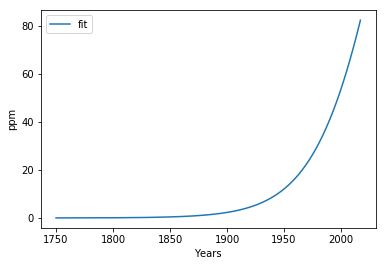

In [11]:
x = range(1750,2018)
y = logisticind(x)*popt[0]*popt[1]
plt.plot(x,y,label='fit')
plt.xlabel('Years')
plt.ylabel('ppm')
plt.legend(loc='best')
plt.savefig('fet.pdf',dpi=1000)

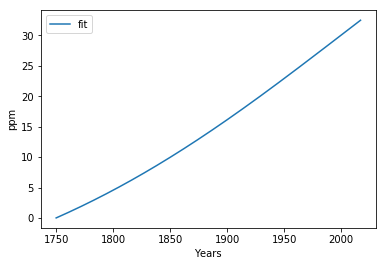

In [12]:
y = co2logintland(x)*popt[0]
plt.plot(x,y,label='fit')
plt.xlabel('Years')
plt.ylabel('ppm')
plt.legend(loc='best')
plt.savefig('fet1.pdf',dpi=1000)

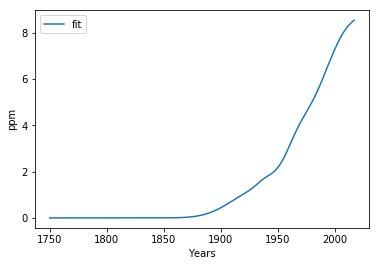

In [13]:
x = np.arange(1750,2018)
# x = range(1750,2018)
y = co2gauss(x)*popt[0]
plt.plot(x,y,label='fit')
plt.xlabel('Years')
plt.ylabel('ppm')
plt.legend(loc='best')
plt.savefig('fet2.pdf',dpi=1000)

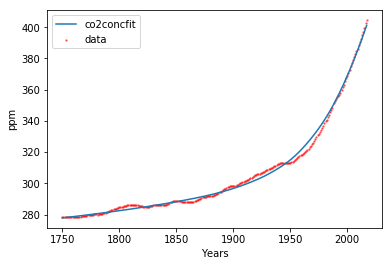

In [14]:
plt.scatter(yrsuse, co2use, s=2,c='r',alpha = 0.5, label="data",marker='o')
yrs = np.arange(1750,2018)
co2fitout = co2conc(yrs, *popt)
plt.plot(yrs,co2fitout,label='co2concfit')
plt.xlabel('Years')
plt.ylabel('ppm')
plt.legend(loc='best')
plt.savefig('fet3.pdf',dpi=1000)


Data post-process

In [15]:
df = pd.DataFrame({'CO2 concentration':yrs,'ppmv':co2use,'for CESM':co2fitout}, columns=["CO2 concentration", "ppmv", "for CESM"])
df.loc[-1]=['Year','Data','Fit']
df.index = df.index+1
df = df.sort_index()
df.loc[(len(df))] = ['2018/06/24','heatco2forcing5mayhui.nb','']
df.to_csv(filename + '.csv', index=False)